# L6: Data Augmentation

Usefulness of Fake Data: add in some extra fake data that looks reasonably like the real data
- improve the performance of a machine learning model by training it on more data
- helps the model to generalize better
- transform the images in our dataset in ways that preserve the class (teach our classifier to ignore those kinds of transformations)

- Several kinds of transformation: rotating the image, adjusting the color or contrast, warping the image, or many other things usually applied in combination
- Data augmentation is usually done online as the images are being fed into the network for training. Each time an image is used during training, a new random transformation is applied
- not every transformation will be useful on a given problem: If you were training a digit recognizer, for instance, rotating images would mix up '9's and '6's. The best approach for finding good augmentations is the same as with most ML problems: try it and see.

Example - Training with Data Augmentation:

Keras lets you augment your data in two ways:
- include it in the data pipeline with a function like ImageDataGenerator
- include it in the model definition by using Keras's preprocessing layers

In [1]:
# Imports
import os, warnings
import matplotlib.pyplot as plt
from matplotlib import gridspec

import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

from tensorflow import keras
from tensorflow.keras import layers
# these are a new feature in TF 2.2
from tensorflow.keras.layers.experimental import preprocessing

import pandas as pd

In [2]:
# Reproducability
def set_seed(seed=31415):
    np.random.seed(seed)
    tf.random.set_seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
set_seed()

# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('image', cmap='magma')
warnings.filterwarnings("ignore") # to clean up output cells


# Load training and validation sets
ds_train_ = image_dataset_from_directory(
    'C:/Amin/Workspace/Data/Kaggle/Computer Vision/archive/train',
    labels='inferred',
    label_mode='binary',
    image_size=[128, 128],
    interpolation='nearest',
    batch_size=64,
    shuffle=True,
)
ds_valid_ = image_dataset_from_directory(
    'C:/Amin/Workspace/Data/Kaggle/Computer Vision/archive/valid',
    labels='inferred',
    label_mode='binary',
    image_size=[128, 128],
    interpolation='nearest',
    batch_size=64,
    shuffle=False,
)

# Data Pipeline
def convert_to_float(image, label):
    image = tf.image.convert_image_dtype(image, dtype=tf.float32)
    return image, label

AUTOTUNE = tf.data.experimental.AUTOTUNE
ds_train = (
    ds_train_
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)
ds_valid = (
    ds_valid_
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)

Found 5117 files belonging to 2 classes.
Found 5051 files belonging to 2 classes.


Step 2 - Define Model

In [3]:
pretrained_base = tf.keras.models.load_model(
    'C:/Amin/Workspace/Data/Kaggle/Computer Vision/archive (2)/cv-course-models/vgg16-pretrained-base',
)
pretrained_base.trainable = False

model = keras.Sequential([
    # Preprocessing
    preprocessing.RandomFlip('horizontal'), # flip left-to-right
#     preprocessing.RandomContrast(0.5), # contrast change by up to 50%

    # Base
    pretrained_base,
    
    # Head
    layers.Flatten(),
    layers.Dense(6, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])

# model.summary()

Step 3 - Train and Evaluate

In [4]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)


In [5]:
history = model.fit(
    ds_train,
    validation_data=ds_valid,
    epochs=30,
)

Epoch 1/30
80/80 [==============================] - 25s 251ms/step - loss: 0.4833 - binary_accuracy: 0.7626 - val_loss: 0.3827 - val_binary_accuracy: 0.8400
Epoch 2/30
80/80 [==============================] - 17s 208ms/step - loss: 0.3599 - binary_accuracy: 0.8446 - val_loss: 0.3450 - val_binary_accuracy: 0.8521
Epoch 3/30
80/80 [==============================] - 17s 208ms/step - loss: 0.3200 - binary_accuracy: 0.8644 - val_loss: 0.3275 - val_binary_accuracy: 0.8634
Epoch 4/30
80/80 [==============================] - 17s 209ms/step - loss: 0.2925 - binary_accuracy: 0.8794 - val_loss: 0.3141 - val_binary_accuracy: 0.8699
Epoch 5/30
80/80 [==============================] - 16s 207ms/step - loss: 0.2723 - binary_accuracy: 0.8927 - val_loss: 0.3098 - val_binary_accuracy: 0.8733
Epoch 6/30
80/80 [==============================] - 17s 207ms/step - loss: 0.2537 - binary_accuracy: 0.8956 - val_loss: 0.3022 - val_binary_accuracy: 0.8751
Epoch 7/30
80/80 [==============================] - 17s 21

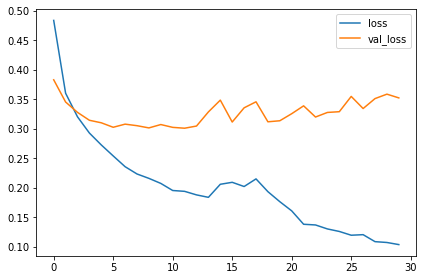

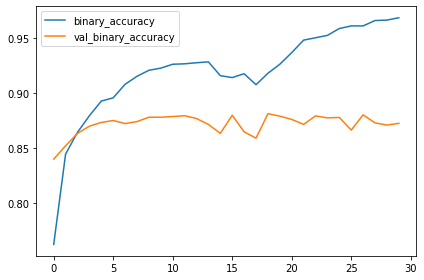

In [6]:
history_frame = pd.DataFrame(history.history)

history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot();